In [13]:
import pandas as pd
import sns as sns

df = pd.read_csv('../idena_data_4_2_2022.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         543 non-null    object 
 1   Open                         543 non-null    float64
 2   High                         543 non-null    float64
 3   Low                          543 non-null    float64
 4   Close                        543 non-null    float64
 5   Adj Close                    543 non-null    float64
 6   Volume                       543 non-null    int64  
 7   facebook_likes               0 non-null      float64
 8   twitter_followers            409 non-null    float64
 9   reddit_average_posts_48h     543 non-null    float64
 10  reddit_average_comments_48h  543 non-null    float64
 11  reddit_subscribers           543 non-null    int64  
 12  reddit_accounts_active_48h   543 non-null    float64
 13  forks               

In [14]:
#Odbacujem fb likes
del df['facebook_likes']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         543 non-null    object 
 1   Open                         543 non-null    float64
 2   High                         543 non-null    float64
 3   Low                          543 non-null    float64
 4   Close                        543 non-null    float64
 5   Adj Close                    543 non-null    float64
 6   Volume                       543 non-null    int64  
 7   twitter_followers            409 non-null    float64
 8   reddit_average_posts_48h     543 non-null    float64
 9   reddit_average_comments_48h  543 non-null    float64
 10  reddit_subscribers           543 non-null    int64  
 11  reddit_accounts_active_48h   543 non-null    float64
 12  forks                        34 non-null     float64
 13  stars               

In [15]:
print(34/543*100)

6.261510128913445


In [16]:
to_delete = ['forks', 'stars', 'subscribers', 'total_issues', 'closed_issues', 'pull_requests_merged',
             'pull_request_contributors', 'commit_count_4_weeks']

for col in to_delete:
    del df[col]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         543 non-null    object 
 1   Open                         543 non-null    float64
 2   High                         543 non-null    float64
 3   Low                          543 non-null    float64
 4   Close                        543 non-null    float64
 5   Adj Close                    543 non-null    float64
 6   Volume                       543 non-null    int64  
 7   twitter_followers            409 non-null    float64
 8   reddit_average_posts_48h     543 non-null    float64
 9   reddit_average_comments_48h  543 non-null    float64
 10  reddit_subscribers           543 non-null    int64  
 11  reddit_accounts_active_48h   543 non-null    float64
 12  idena_unscaled               543 non-null    int64  
 13  idena_monthly       

In [17]:
print(77/543*100)

14.180478821362799


In [18]:
del df['isPartial']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         543 non-null    object 
 1   Open                         543 non-null    float64
 2   High                         543 non-null    float64
 3   Low                          543 non-null    float64
 4   Close                        543 non-null    float64
 5   Adj Close                    543 non-null    float64
 6   Volume                       543 non-null    int64  
 7   twitter_followers            409 non-null    float64
 8   reddit_average_posts_48h     543 non-null    float64
 9   reddit_average_comments_48h  543 non-null    float64
 10  reddit_subscribers           543 non-null    int64  
 11  reddit_accounts_active_48h   543 non-null    float64
 12  idena_unscaled               543 non-null    int64  
 13  idena_monthly       

In [19]:
409/543*100

75.32228360957643

In [20]:
import scipy
#Interpolacijom popunjavam nedostajuce vrednosti zbog pretpostavke da broj twitter pratilaca raste po nekoj zakonitosti
df['twitter_followers'] = df['twitter_followers'].interpolate(method='slinear').interpolate(method='linear')


In [21]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,twitter_followers,reddit_average_posts_48h,reddit_average_comments_48h,reddit_subscribers,reddit_accounts_active_48h,idena_unscaled,idena_monthly,scale,idena
0,11/08/2020,0.125496,0.137770,0.124239,0.130634,0.130634,40783,1817.0,0.273,0.000,298,6.666667,0,37.0,0.37,0.00
1,12/08/2020,0.130674,0.162275,0.128384,0.138122,0.138122,65517,1829.0,0.182,0.091,300,6.750000,0,37.0,0.37,0.00
2,13/08/2020,0.138128,0.138128,0.118348,0.127606,0.127606,41988,2149.0,0.083,0.167,302,6.615385,0,37.0,0.37,0.00
3,14/08/2020,0.127084,0.201024,0.121670,0.201024,0.201024,104705,2208.0,0.000,0.000,304,7.083333,34,37.0,0.37,12.58
4,15/08/2020,0.201097,0.202423,0.138915,0.162744,0.162744,50419,2267.0,0.100,0.000,307,5.636364,0,37.0,0.37,0.00


In [22]:
df.isna().sum(axis = 0)

Date                           0
Open                           0
High                           0
Low                            0
Close                          0
Adj Close                      0
Volume                         0
twitter_followers              0
reddit_average_posts_48h       0
reddit_average_comments_48h    0
reddit_subscribers             0
reddit_accounts_active_48h     0
idena_unscaled                 0
idena_monthly                  0
scale                          0
idena                          0
dtype: int64

In [23]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)
df.to_csv('../idena_v1.csv')

You should consider upgrading via the 'C:\Users\Predrag\Desktop\SIAP\ProjectSiap2021\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Predrag\Desktop\SIAP\ProjectSiap2021\venv\Scripts\python.exe -m pip install --upgrade pip' command.


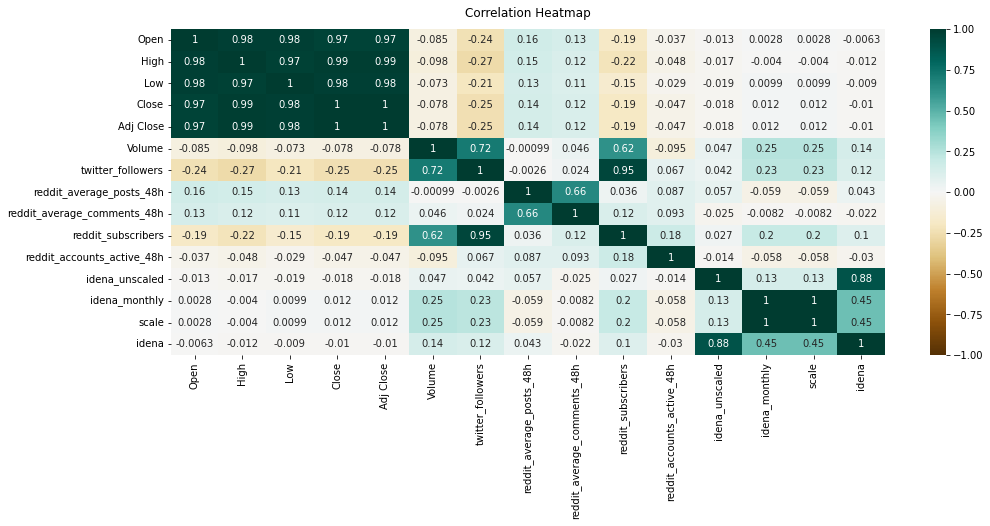

In [24]:
!{sys.executable} -m pip install  matplotlib
!{sys.executable} -m pip install seaborn
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), cmap='BrBG', vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.savefig('../idena_heatmap.png', dpi=300, bbox_inches='tight')

In [27]:
to_remove_low_corr_independent = [ 'reddit_average_posts_48h',
                                  'reddit_average_comments_48h', 'reddit_subscribers', 'reddit_accounts_active_48h',
                                  'idena_unscaled', 'idena_monthly', 'scale', 'idena','Volume', 'twitter_followers']

for variable in to_remove_low_corr_independent:
    del df[variable]


KeyError: 'Volume'

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 543 entries, 2020-08-11 to 2022-02-04
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       543 non-null    float64
 1   High       543 non-null    float64
 2   Low        543 non-null    float64
 3   Close      543 non-null    float64
 4   Adj Close  543 non-null    float64
dtypes: float64(5)
memory usage: 25.5 KB


In [29]:
to_remove_high_multi = ['Open', 'High', 'Low']
for variable in to_remove_high_multi:
    del df[variable]
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 543 entries, 2020-08-11 to 2022-02-04
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Close      543 non-null    float64
 1   Adj Close  543 non-null    float64
dtypes: float64(2)
memory usage: 12.7 KB


In [30]:
df.to_csv('../idena_v2.csv')